# Figure 2

In [1]:
import numpy as np
import astropy.constants as const

from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70., Om0=0.3)

from load_opt_spec import load_cow_sps, load_mrf_sp, bin_spec

import matplotlib
import matplotlib.pyplot as plt
fs= 10
matplotlib.rcParams['font.size']=fs

In [2]:
def custom_ax(ax):
    ax.tick_params(which = 'major', length = 4, top=True, direction = "in", right = True)
    ax.tick_params(which = 'minor', length = 2, top=True, direction = "in", right = True)
    ax.xaxis.set_major_locator(plt.MultipleLocator(1000))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(100))
    
    ax.set_xlabel('Rest-frame Wavelength ('+r'$\rm \AA$'+')')
    ax.set_ylabel(r'$L_{\lambda}$'+" (erg"+r"$\,{\rm s^{-1}\,\AA^{-1}}$"+")")
    

def add_cow_spec(ax, dt, spcol = "sp1", color_cow="k"):
    lwcow1 = 0.5
    alphacow1 = 0.5
    
    lwcow = 0.8
    alphacow = 1
    
    wave = dt[spcol]["wave"]
    flux = dt[spcol]["flux0"]
    phase = dt[spcol]["phase"]
    scale = 1
    ax.plot(wave, flux*scale, color = color_cow, alpha = alphacow1, linewidth = lwcow1)
    
    ww1, ff1 = bin_spec(wave, flux, binning = 5)
    #ax.plot(dt[spcol]["wave_con"], dt[spcol]["flux0_con"], color = color_cow, alpha = alphacow, linewidth = lwcow)
    ax.plot(ww1, ff1*scale, color = color_cow, alpha = alphacow, linewidth = lwcow)
    
    ypos = ff1[0]
    if phase in [5.353, 7.145]:
        xpos = 2800
        ax.text(xpos, ypos, "AT2018cow \n%.1f d"%phase, color = color_cow)
    if phase in [4.946, 4.651]:
        xpos = 3600
        ax.text(xpos, ypos, "AT2018cow \n     %.1f d"%phase, color = color_cow)
    print (xpos, ypos)
    
    
def add_mrf_spec(ax, dt, scale = 1):
    color_rmf = "k"
    spcol = "sp"
    wave = dt[spcol]["wave"]
    flux = dt[spcol]["flux0"]
    
    ix = flux<-1e+38
    flux[ix] = 0
    #ix = wave<8500
    #wave = wave[ix]
    #flux = flux[ix]
    ax.plot(wave, flux*scale, color = color_rmf, alpha = 0.1, linewidth = 0.5,
            zorder = 5)
    
    ww1, ff1 = bin_spec(wave, flux, binning = 5)
    ww2, ff2 = bin_spec(wave, flux, binning = 11)
    ww3, ff3 = bin_spec(wave, flux, binning = 27)
    wv_cut1 = 6000
    wv_cut2 = 7500
    ix1 = ww1 < wv_cut1
    ix2 = (ww2 > wv_cut1)&((ww2 < wv_cut2))
    ix3 = ww3 > wv_cut2
    ww = np.hstack([ww1[ix1], ww2[ix2], ww3[ix3]])
    ff = np.hstack([ff1[ix1], ff2[ix2], ff3[ix3]])
    ax.plot(ww, ff*scale, color = color_rmf, alpha = 1, linewidth = 1,
            zorder = 10)
    
    phase = dt[spcol]["phase"]
    xpos = 2700
    ypos = ff[0]*scale
    if scale != 1:
        ax.text(xpos, ypos*0.3, "AT2020mrf \n %.1f d, %.1f"%(phase, scale)+r"$L_{\lambda}$", color = color_rmf)
    else:
        ax.text(xpos, ypos*0.45, "AT2020mrf \n %.1f d"%(phase), color = color_rmf)
        

def customize_ax(ax, xmin = 4200, vmax = 10300):
    ax.set_xlim(xmin, vmax)
    ax.tick_params(which = 'major', length = 4, top=True, direction = "in")
    ax.tick_params(which = 'minor', length = 2, top=True, direction = "in")
    ax.xaxis.set_major_locator(plt.MultipleLocator(1000))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(100))
    #ax.set_xticklabels([4000, 5000, 6000, 7000, 8000, 9000, 10000])
    
    
def Planck(nu=None, T=None):
    """
    >> I = Planck(nu=1e14, T=1e4)

    return black body intensity (power per unit area per solid angle per frequency)
    """
    h = const.h.cgs.value
    c = const.c.cgs.value
    k_B = const.k_B.cgs.value
    x = np.exp(h*nu/(k_B*T))
    x = np.array(x)
    return 2*h/c**2 * nu**3 / (x-1)


def add_bbody(ax):
    wv = np.linspace(2000, 9500) # AA
    nu = 3e+10 / (wv * 1e-8) # Hz
    Tbb = 20000
    #Tbb = 19000
    Bnu = Planck(nu, Tbb)
    Fnu = Bnu* np.pi 
    Rbb = 7.9e+14 # cm
    Lnu = Fnu * 4 * np.pi * Rbb**2
    Llambda = Lnu * nu / wv
    ax.plot(wv, Llambda, linewidth = 2.5, alpha = 0.5, color = "darkorange",
            zorder = 1, linestyle = "--")

3600 1.1966034846633392e+40
2800 1.553221253978463e+40


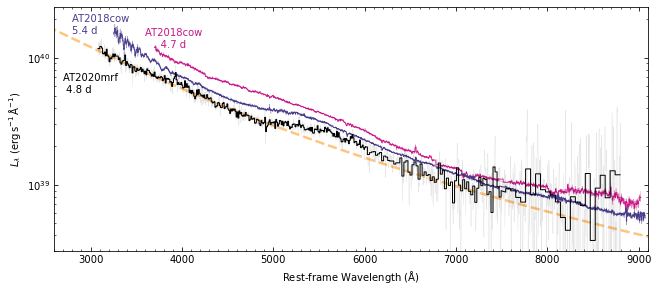

In [3]:
    dt_cow = load_cow_sps(lamb_norm = 4241, v_con = 300)
    dt_mrf = load_mrf_sp(v_con = 400)
    
    fig = plt.figure(figsize=(9, 4))
    ax = plt.subplot(111)
    
    color_cow1 = "mediumvioletred"
    color_cow2 = "blueviolet"
    color_cow3 = "darkslateblue"
    add_cow_spec(ax, dt_cow, "sp1", color_cow=color_cow1)
    add_cow_spec(ax, dt_cow, "sp3", color_cow=color_cow3)
    add_mrf_spec(ax, dt_mrf)
    
    add_bbody(ax)
    
    ax.semilogy()
    custom_ax(ax)
    ax.set_ylim(3e+38, 2.5e+40)
    ax.set_xlim(2600, 9100)
    plt.tight_layout(rect = (-0.01, -0.02, 1.02, 1.02))